# Statistik

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=3, suppress=True, floatmode="fixed", formatter={"float": np.format_float_positional})
sns.set_theme(font_scale=.75, style="dark")

rng = np.random.default_rng(seed=42)

In [2]:
# shoes["data"] = rng.normal(39, 6, 30).astype(int)
shoes = pd.Series([38, 41, 42, 42.5, 45, 39, 40, 41, 42, 43, 44, 45, 38, 39, 40, 41, 42, 43, 44, 45])

## Sannolikhetsfördelning

### Slumpvariabler
Vilken skostorlek har en person? Det beror förstår på vilken person vi råkar fråga.

Inom statistiken säger man att en persons skostorlek är en *slumpvariabel*.

Det finns en viss mängd skostorlekar en person kan ha. Det innebär att skostorlek är en *diskret* slumpvariabel. Om vi tittar på exempelvis vikt eller längd kallas de *kontinuerliga* slumpvariabler eftersom de kan anta alla värden inom ett intervall. Det vill säga, en person kan inte ha 38,182 i skostorlek men kan vara 176,235 cm lång.


### Utfallsrum
De värden en slumpvariabel kan anta kallas för dess *utfallsrum*. Vi brukar skilja på själva slumpvariabeln $X$, och de värden den kan anta, $x$.

### Sannolikhet
Sannolikheten att slumpvariabeln $X$ antar värdet $x$ betecknas

$p(x)$

vilket också kallas för slumpvariabelns *sannolikhetsfördelning*.

#### Exempel 1: Singla slant
Ett klassiskt exempel på det här är att singla slant.

Slumpvariabeln $X$ är resulatet av en slantsingling, och utfallsrummet $x$ är $\{krona, klave\}$.

Summan av alla möjliga utfalls sannolikheter måste alltid bli $1$ eftersom något utfall måste ske. I fallet med slantsingling kan vi anta att det är lika stor sannolikhet att slumpvariabeln $X$ antar värdet $krona$ eller $klave$. 

$p(krona)$ är alltså $\dfrac{1}{\text{antal möjliga utfall}} = \dfrac{1}{2} = 0.5$.


#### Exempel 2: Kasta tärning
Ett annat klassiskt exempel är att kasta tärning. En vanlig sexsidig tärning har utfallsrummet $\{1, 2, 3, 4, 5, 6\}$. 

Sannolikheten att man kastar en sexsidig tärning och den visar en sexa är alltså $\dfrac{1}{6} \approx 0,166$.

Vi kan undersöka det här förhållandet genom att simulera ett antal tärningskast och undersöka fördelningen av resultat.

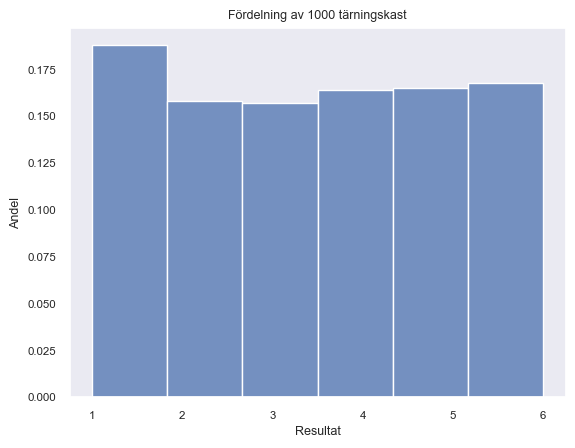

In [3]:
n = 1000
dice_rolls = rng.uniform(1, 7, n).astype(int)
ax = sns.histplot(dice_rolls, stat="proportion", bins=6)
ax.set(title=f"Fördelning av {n} tärningskast", xlabel="Resultat", ylabel="Andel");

Andelarna ligger ganska samlade runt vår sannolikhet på $0,166$. Vi kan kolla hur många av våra tärningskast som blev sexor:

In [4]:
(dice_rolls == 6).sum()/n

np.float64(0.168)

In [5]:
shoes.data.hist(bins=15)

AttributeError: 'Series' object has no attribute 'data'

När sannolikheten är lika stor för alla möjliga utfall kallas det för en *uniform fördelning*.

## Väntevärde och varians

### Väntevärde
Inom statistiken arbetar vi ofta med *stickprov*. Vi kan till exempel inte samla in data om hela befolkningen, men vi kan göra ett *urval* och låta det urvalet representera hela befolkningen. Urvalet urgör då ett stickprov av hela befolkningen.

Om vi sedan vill beskriva vårt stickprov är det vanligt att vi använder *medelvärdet*, det vill säga summan av de observerade värdena, delat med antalet observationer. Vi kan beskriva det matematiskt med:

$$ \bar{x} = \dfrac{\sum x}{n} $$

Väntevärdet för ett kast med en sexsidig tärning är summan av alla utfallen, delat på antalet utfall.

$$E(X) = \mu = \dfrac{1+2+3+4+5+6}{6} = \dfrac{21}{6} = 3,5$$

In [6]:
np.mean([1, 2, 3, 4, 5, 6])

np.float64(3.5)

Om vi tar vår simulering av 1000 tärningskast och kollar medelvärdet ser vi att det ligger nära väntevärdet $3,5$.

In [7]:
dice_rolls.mean()

np.float64(3.464)

Vi kan också kolla på våra skostorlekar.

In [8]:
shoes.data.mean()

AttributeError: 'Series' object has no attribute 'data'

I genomsnitt har en person i klassen ungefär $43$ i skostorlek.

Eftersom vi inte kan fråga alla personer i Sverige vad de har för skostorlek kan vi använda vår undersökning som ett stickprov. Medelvärdet av våra skostorlekar kan användas för att bilda oss en uppfattning om slumpvariabeln "en slumpmässig persons skostorlek". Medelvärdet för en slumpvariabel kallas för variabelns *väntevärde*.

Medelvärdet kallas för ett *lägesmått* och brukar beskrivas med den grekiska bokstaven *mu*, $\mu$ för hela populationen, och $\bar{x}$ för ett stickprov.

Skillnaden mellan $\mu$ och $\bar{x}$ är att $\mu$ är okänd men konstant (det finns ett faktiskt svar, men det kan vara svårt att ta reda på) medan $\bar{x}$ är en slumpvariabel vars värde beror på vilka observationer som råkar komma med i stickprovet.

### Varians
Medelvärdet är ett viktigt mått, men den säger inte allt! Ett annat viktigt värde för att förstå data är *variansen*, som är ett *spridningsmått*.

<!-- $$ \delta^2 = \dfrac{1}{n} \sum^{n}_{i=1}(x_i-\mu)^2 $$ -->

Variansen beskriver hur stort avståndet i genomsnitt är mellan de olika värdena och medelvärdet - den är alltså i sig ett medelvärde.

Även här skiljer vi på variansen i populationen, som beskrivs som den grekiska bokstaven *sigma* i kvadrat, $\sigma^2$, och variansen i ett stickprov, $s^2$.

Eftersom värden kan ligga både under och över medelvärdet brukar man *kvadrera* skillnaderna, det vill säga multiplicera dem med sig själva. Eftersom både negativa och positiva tal som multipliceras med sig själva blir positiva undviker vi att negativa och positiva skillnader "tar ut" varandra.

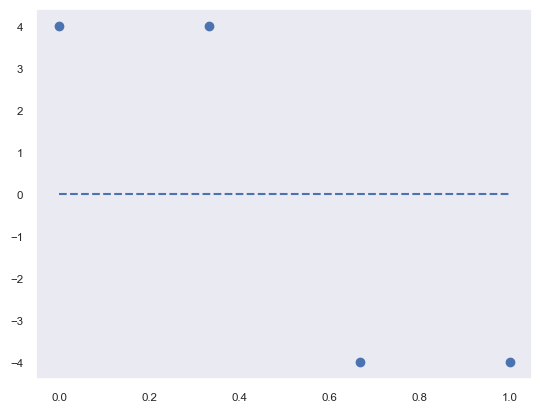

In [9]:
x = np.linspace(0, 1, 4)
y = np.array([4, 4, -4, -4])

plt.scatter(x, y)
plt.hlines(y=0, xmin=0, xmax=1, linestyles="--")

$$\dfrac{4+4-4-4}{4}=0$$

In [10]:
(y - y.mean()).sum()/len(y)

np.float64(0.0)

Resultatet av att summera alla värdens avstånd till medelvärdet blir väldigt litet om vi inte kvadrerar dem.

$$\dfrac{4^2+4^2+(-4)^2+(-4)^2}{4}=16$$

In [11]:
((y - y.mean())**2).sum()/len(y)

np.float64(16.0)

Vi kan använda metoden `var()` istället för att räkna ut variansen.

In [12]:
dice_rolls.var()

np.float64(3.030704)

Vi kan göra samma sak med vår skodata.

In [13]:
shoes.data.var(ddof=0) # ddof = delta degrees of freedom.

AttributeError: 'Series' object has no attribute 'data'

#### Stickprovsvariansen $s^2$
Om vi arbetar med ett stickprov istället för en population behöver vi dela med $n-1$ istället för $n$.

Om vi bara är intresserade av skostorlekarna bland de personer om varit med i undersökningen skulle vår data vara populationen. Om vi vill använda datan för att göra uppskattningar om en större population - YH-studenter, Sveriges befolkning, och så vidare - är det istället ett stickprov, och vi behöver räkna ut stickprovsvariansen.

Vi gör på samma sätt, men vi delar med $n - 1$ istället för $n$.

In [ ]:
((shoes.data - shoes.data.mean())**2).sum()/(len(shoes)-1)


Metoden `var()` räknar ut stickprovsvariansen om vi inte säger till den något annat.

In [ ]:
shoes.data.var()

Vi ser att variansen ökar när vi dividerar med $n-1$ eftersom vi introducerar en osäkerhet.

### Standardavvikelsen

Ett problem med variansen är att den inte är i samma *skala* som våra originalvärden. Den går alltså inte att tolka utifrån vår data. Därför pratar man ofta om *standardavvikelsen*, vilket är roten ur variansen. Standardavvikelsen för en population brukar beskrivas med den grekiska bokstaven *sigma*, $\sigma$, och variansen som $\sigma^2$.

$$ \sigma = \sqrt{\sum(x-\mu)^2} $$

Standardavvikelsen för våra tärningskast kan vi ta fram med metoden `std()`.

In [ ]:
dice_rolls.std()


Standardavvikelsen för vår skodata är ungefär

In [ ]:
np.sqrt(((shoes.data - shoes.data.mean())**2).sum()/(len(shoes.data)-1))

In [ ]:
shoes.data.std()

Medelvärdet och standardavvikelsen är så viktiga mått att de är med när vi kör metoden `describe()`.

In [ ]:
shoes.data.describe()

### Begränsningar med väntevärde och varians

Väntevärde och varians är som sagt viktiga mått för att kunna förstå sin data, men de säger inte allt! Ofta behöver vi titta på datan visuellt också.

*Anscombe's quartet* består av fyra dataset som togs fram på 70-talet av statistikern Francis Anscombe. Om vi bara kollar på medelvärdena och standardavvikelserna ser de fyra dataseten likadana ut.

In [ ]:
data = sns.load_dataset("anscombe")
data.groupby("dataset").mean()
data.groupby("dataset").std()

Vi visualiserar dem också.

In [ ]:
sns.relplot(data, x="x", y="y", col="dataset", col_wrap=2, height=3)

## Den relativa frekvensens stabilitet

Ju fler försök vi gör, det vill säga ju större stickprov vi har, desto mer kommer den *relativa frekvensen* att stabilisera sig kring ett visst värde.

Tidigare såg vi att väntevärdet för ett tärningskast med en sexsidig tärning är $3,5$.

Vi kan undersöka hur medelvärdet förändras med fler försök.

In [ ]:
x = np.arange(1, 1001)
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(y=dice_rolls.cumsum()/x, x=x, alpha=.75, ax=ax)
ax.hlines(xmin=1, xmax=1000, y=3.5, color="k", linestyles="--", alpha=.5)
ax.set(
    title="Medelvärdet av resultaten närmar sig väntevärdet 3,5",
    xlabel="Antal tärningskast",
    ylabel="Resultat (medelvärde)",
);

## Normalfördelningen

In [ ]:
ax = plt.gca()
st.Normal(mu=0, sigma=[1, 2, 3]).plot(ax=ax) # type: ignore

Väldigt många företeelser, i naturen och i våra samhällen, kan beskrivas med *normalfördelningen*.

Om vi singlar slant 100 gånger kan vi förvänta oss att vi kommer att få $krona$ ungefär 50 gånger. Om vi simulerar de här 100 slantsinglingarna *flera gånger* och undersöker antalet $krona$ kommer vi se att det är normalfördelat med medelvärdet 50.

Det här kallas för den *centrala gränsvärdessatsen* och är väldigt användbar när vi sysslar med statistik och dataanalys.

In [ ]:
coin_tosses = rng.binomial(100, .5, 10000) # Singla 100 slantar 10000 gånger
ax = sns.histplot(coin_tosses, bins=10, kde=True)
ax.set(title="Fördelning av antal krona efter 100 slantsinglingar utförda 10 000 gånger.", xlabel="Antal krona", ylabel="Frekvens");

In [ ]:
ax = sns.histplot(shoes, kde=True)
ax.set(title="Fördelning av skostorlekar")

Python-biblioteket *scipy* har en modul som heter `stats`, som har en del objekt och funktioner som vi kan använda när vi arbetar med statistik.

Bland annat kan vi skapa en normalfördelning och ange $\mu$ och $\sigma$.

In [ ]:
dist = st.Normal(mu=shoes.data.mean(), sigma=shoes.data.std())
ax = dist.plot()
sns.kdeplot(shoes, linestyle="--", label="Skostorlekar", ax=ax)
ax.set(title="Normalfördelning med medelvärde och standardfördelning från skostorlek-datan");

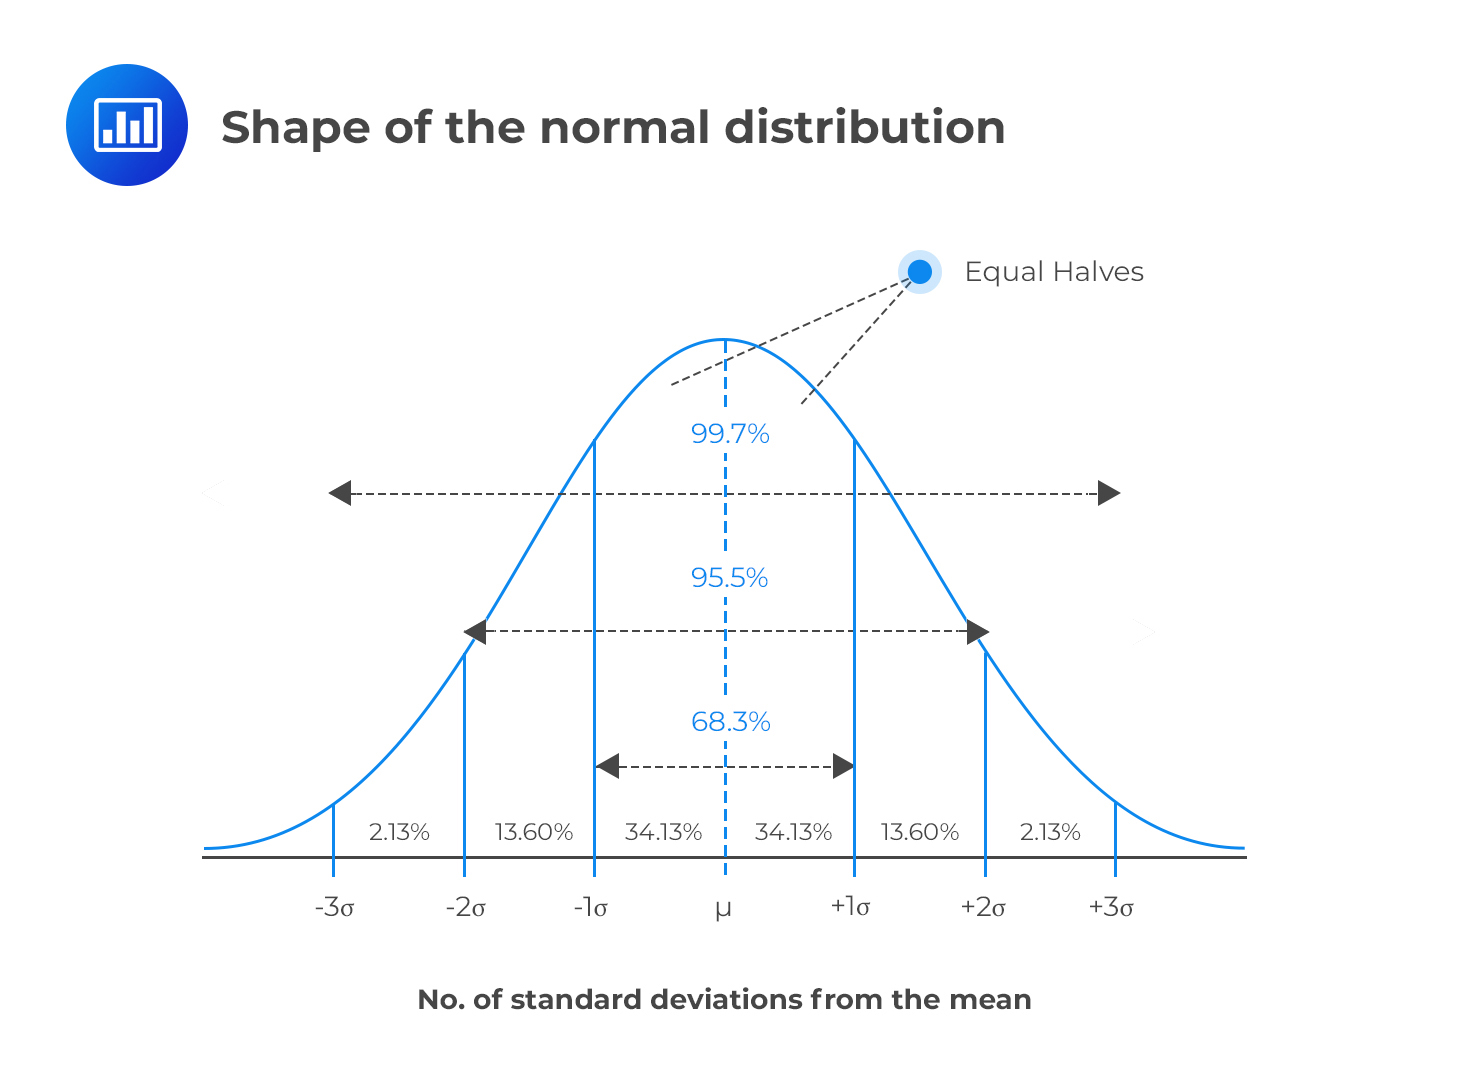

## Konfidensintervall

Hur vet vi om vårt stickprov är representativt för populationen? Om värdena vi undersöker är normalfördelade kan vi använda *konfidensintervall*.

Vi utgår från en variabel som är normalfördelad med väntevärdet $\mu$ och standardavvikelsen $\sigma$.

Givet ett stickprov med $n$ observationer gäller då att stickprovets medelvärde $\bar{X}$ är normalfördelat med väntevärdet $\mu$ och standardavvikelsen $\dfrac{\sigma}{\sqrt{n}}$

Då kan vi se att stickprovets medelvärde $\bar{X}$ med sannolikheten $95\%$ antar ett värde mellan $\mu - 1,96 \cdot \dfrac{\sigma}{\sqrt{n}}$ och $\mu + 1,96 \cdot \dfrac{\sigma}{\sqrt{n}}$.

Värdet $1,96$ kommer från hur normalfördelningen fungerar. I bilden ovan ser vi att $95,5\%$ av alla värden ligger mellan -2 och 2 standardavvikelser från medelvärdet. $1,96$ är valt för att den andelen ska bli $95\%$ istället.

### Exempel på konfidensintervall

Nedan följer ett exempel för att visa hur konfidensintervall fungerar. 

In [ ]:
n = 100
x = rng.normal(0, 5, n)
y = np.arange(n)
low, high = st.norm.interval(.95, x.mean(), x.std())
low = x + low
high = x + high
in_interval = ["g" if b else "r" for b in list((low < 0) & (high > 0))]
# "g" if ((low < 0) & (high > 0)) else "r"

Vi genererar data, `x`, som innehåller 100 normalfördelade värden med $\mu = 0$ och $\sigma = 5$.

In [ ]:
ax = sns.kdeplot(x=x)
ax.set(title="Fördelning av värden i x", xlabel="x")


Vi använder `interval()`-funktionen från `scipy.stats` för att få fram konfidensintervallet för fördelningen.

Sedan kan vi för varje observerat värde undersöka om medelvärdet 0 är med i konfidensintervallet. Vi förväntar oss att ungefär 5 av våra observerade värden kommer att vara utanför konfidensintervallet efter som vi har satt det till 95%.

Vi plottar resultatet nedan. Varje prick är en observation i `x` med tillhörande konfidensintervall (linjen). De observationer vars konfidensintervall inte innehåller det faktiska medelvärdet 0 är rödmarkerade.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.vlines(x=0, ymin=-1, ymax=n + 1, colors="k", linestyles="--", alpha=.25)
ax.hlines(y=y, xmin=low, xmax=high, colors=in_interval)
ax.scatter(x=x, y=y, s=5, c=in_interval, alpha=.75)
ax.set(xlim=(-25, 25))